In [1]:
import pandas as pd

In [2]:
labelled_data = pd.read_csv('../data/data20190317.csv', index_col=0,header=0, 
                            encoding = "utf8")
labelled_data.head(2)

,text,tags,tags_new
0,"$160 for 2 filets, 2 sides, an appetizer and d...","price#neutral, food#neutral","['price#neutral', 'food#neutral']"
1,$170 down the toilet...,"price#negative, anecdotes/miscellaneous#negative","['price#negative', 'anecdotes/miscellaneous#ne..."


In [3]:
labelled_data.shape

(8726, 3)

In [4]:
labelled_data.drop('tags_new', axis=1, inplace=True)

In [5]:
labelled_data.shape

(8726, 2)

# Remove Empty Rows

# Label Handling

In [6]:
labelled_data['tags_cleaned'] = labelled_data.tags.apply(lambda x : [t.strip() for t in x.split(',')])
labelled_data['tags_cleaned'].head()

0                        [price#neutral, food#neutral]
1    [price#negative, anecdotes/miscellaneous#negat...
2                                     [price#positive]
3                      [price#positive, food#positive]
4                      [price#positive, food#positive]
Name: tags_cleaned, dtype: object

In [7]:
tag_lst = []
for x in labelled_data['tags_cleaned']:
    tag_lst.extend(x)
    

set(tag_lst)


{'ambience#conflict',
 'ambience#negative',
 'ambience#neutral',
 'ambience#positive',
 'anecdotes/miscellaneous#conflict',
 'anecdotes/miscellaneous#negative',
 'anecdotes/miscellaneous#neutral',
 'anecdotes/miscellaneous#positive',
 'food#conflict',
 'food#negative',
 'food#neutral',
 'food#positive',
 'price#conflict',
 'price#negative',
 'price#neutral',
 'price#positive',
 'service#conflict',
 'service#negative',
 'service#neutral',
 'service#positive'}

In [8]:
tags = ['ambience#conflict',
 'ambience#negative',
 'ambience#neutral',
 'ambience#positive',
 'anecdotes/miscellaneous#conflict',
 'anecdotes/miscellaneous#negative',
 'anecdotes/miscellaneous#neutral',
 'anecdotes/miscellaneous#positive',
 'food#conflict',
 'food#negative',
 'food#neutral',
 'food#positive',
 'price#conflict',
 'price#negative',
 'price#neutral',
 'price#positive',
 'service#conflict',
 'service#negative',
 'service#neutral',
 'service#positive']

In [9]:
sent_df1 = labelled_data[['text','tags_cleaned']]
sent_df1.index = sent_df1.index.astype('int')
sent_df1.head()

,text,tags_cleaned
0,"$160 for 2 filets, 2 sides, an appetizer and d...","[price#neutral, food#neutral]"
1,$170 down the toilet...,"[price#negative, anecdotes/miscellaneous#negat..."
2,$20 for all you can eat sushi cannot be beaten.,[price#positive]
3,$20 gets you unlimited sushi of a very high qu...,"[price#positive, food#positive]"
4,"$6 and there is much tasty food, all of it fre...","[price#positive, food#positive]"


In [10]:
any(sent_df1.index.isnull())

False

In [21]:
# import os
# import csv
# import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('fivethirtyeight')

In [22]:
from collections import Counter
from  itertools import chain

count_df = pd.Series(Counter(chain(*sent_df1.tags_cleaned))).sort_index().rename_axis('tags').reset_index(name='freq')

print (count_df)

                                tags  freq
0                  ambience#conflict    63
1                  ambience#negative   307
2                   ambience#neutral   144
3                  ambience#positive   769
4   anecdotes/miscellaneous#conflict    40
5   anecdotes/miscellaneous#negative   522
6    anecdotes/miscellaneous#neutral   817
7   anecdotes/miscellaneous#positive  1093
8                      food#conflict   181
9                      food#negative   866
10                      food#neutral   508
11                     food#positive  2517
12                    price#conflict    24
13                    price#negative   307
14                     price#neutral    70
15                    price#positive   364
16                  service#conflict    66
17                  service#negative   811
18                   service#neutral   113
19                  service#positive   827


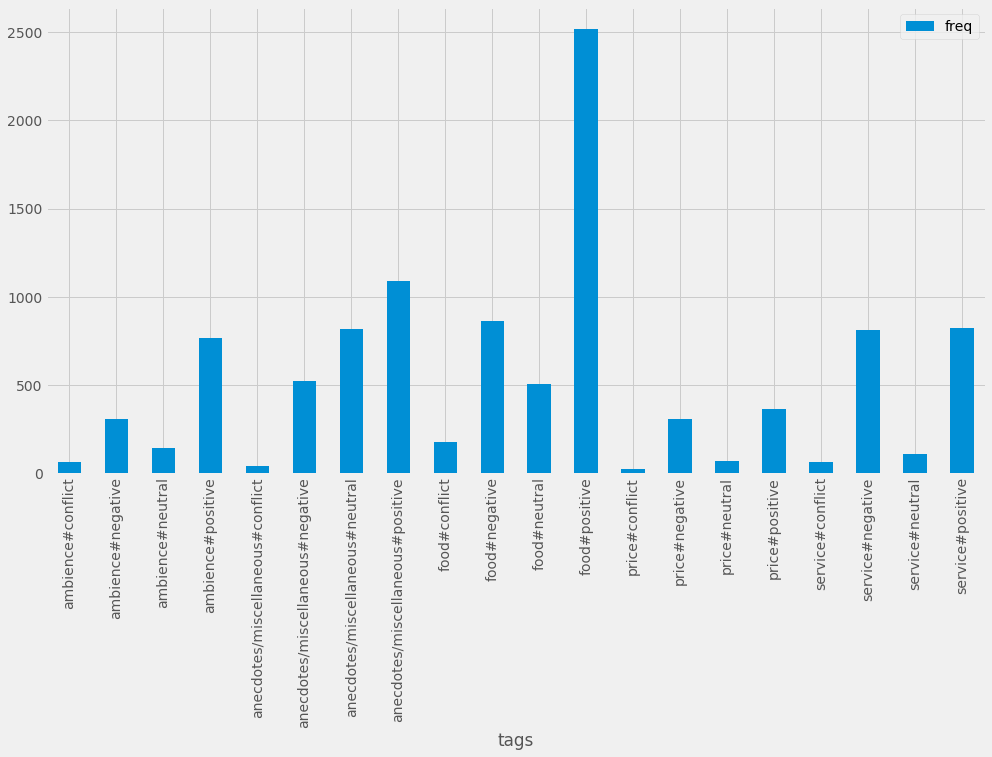

In [23]:
count_df.set_index(count_df.tags, inplace=True)
count_df.plot(kind='bar', figsize=(15, 8))

In [24]:
sent_df2 = sent_df1.copy()
sent_df2['num_labels'] = sent_df2.tags_cleaned.apply(lambda x : len(x))
sent_df2['num_labels'].head()

0    2
1    2
2    1
3    2
4    2
Name: num_labels, dtype: int64

In [25]:
multi_count_df = sent_df2['num_labels'].value_counts()
multi_count_df

1    7369
2    1090
3     212
4      51
5       4
Name: num_labels, dtype: int64

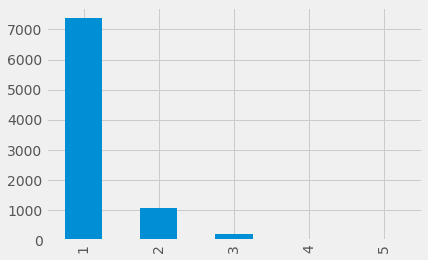

In [26]:
multi_count_df.plot(kind='bar', )

# Text preprocessing

In [27]:
import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
import re
import sys
import warnings
data = sent_df1
if not sys.warnoptions:
    warnings.simplefilter("ignore")
def cleanHtml(sentence):
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, ' ', str(sentence))
    return cleantext
def cleanPunc(sentence): #function to clean the word of any punctuation or special characters
    cleaned = re.sub(r'[?|!|\'|"|#]',r'',sentence)
    cleaned = re.sub(r'[.|,|)|(|\|/]',r' ',cleaned)
    cleaned = cleaned.strip()
    cleaned = cleaned.replace("\n"," ")
    return cleaned
def keepAlpha(sentence):
    alpha_sent = ""
    for word in sentence.split():
        alpha_word = re.sub('[^a-z A-Z]+', ' ', word)
        alpha_sent += alpha_word
        alpha_sent += " "
    alpha_sent = alpha_sent.strip()
    return alpha_sent

In [28]:
sent_df1.shape

(8726, 2)

In [29]:
data.text.dtype

dtype('O')

In [30]:
any(data.text.isnull())

False

In [31]:
data['text'] = data['text'].str.lower()
data['text'] = data['text'].apply(cleanHtml)
data['text'] = data['text'].apply(cleanPunc)
data['text'] = data['text'].apply(keepAlpha)



In [32]:
stop_words = set(stopwords.words('english'))
stop_words.update(['zero','one','two','three','four','five','six','seven','eight','nine','ten','may','also','across','among','beside','however','yet','within'])
re_stop_words = re.compile(r"\b(" + "|".join(stop_words) + ")\\W", re.I)
def removeStopWords(sentence):
    global re_stop_words
    return re_stop_words.sub(" ", sentence)

In [33]:
data['text'] = data['text'].apply(removeStopWords)


In [34]:
stemmer = SnowballStemmer("english")
def stemming(sentence):
    stemSentence = ""
    for word in sentence.split():
        stem = stemmer.stem(word)
        stemSentence += stem
        stemSentence += " "
    stemSentence = stemSentence.strip()
    return stemSentence

In [35]:
data['text'] = data['text'].apply(stemming)

In [36]:
data.text[0]

0                               filet side appet drink
0    hey kati f updat still gone back arbi vega wen...
Name: text, dtype: object

In [37]:
data.shape

(8726, 2)

In [38]:
from sklearn.preprocessing import MultiLabelBinarizer
multilabel_binarizer = MultiLabelBinarizer()
multilabel_binarizer.fit(data['tags_cleaned'])
Y = multilabel_binarizer.transform(data['tags_cleaned'])
Y[:5]

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0]])

In [39]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(data.text)

tfidf_transformer = TfidfTransformer()
X_tfidf = tfidf_transformer.fit_transform(X_counts)

In [40]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_tfidf, Y, test_size=0.2, 
                                                    random_state=2019)

# One vs. Rest

In [41]:
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import LinearSVC

from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import hamming_loss, accuracy_score, classification_report

In [59]:
from sklearn.ensemble import RandomForestClassifier

In [42]:
def hamming_score(y_true, y_pred, normalize=True, sample_weight=None):
    '''
    Compute the Hamming score (a.k.a. label-based accuracy) for the multi-label case
    http://stackoverflow.com/q/32239577/395857
    '''
    acc_list = []
    for i in range(y_true.shape[0]):
        set_true = set( np.where(y_true[i])[0] )
        set_pred = set( np.where(y_pred[i])[0] )
        tmp_a = None
        if len(set_true) == 0 and len(set_pred) == 0:
            tmp_a = 1
        else:
            tmp_a = len(set_true.intersection(set_pred))/float(len(set_true.union(set_pred)) )
        acc_list.append(tmp_a)
    return np.mean(acc_list)

In [43]:
def print_score(y_pred, clf):
    print("Clf: ", clf.__class__.__name__)
    print("Hamming loss: {}".format(hamming_loss(y_pred, y_test)))
    print("Hamming score: {}".format(hamming_score(y_pred, y_test)))
    print('acc: ', accuracy_score(y_pred, y_test))
    print("---") 

In [44]:
# calculation of alpha (C=5) for sgdClassifier
alpha = 1/(x_train.shape[0]*5)

In [64]:
import numpy as np

mn = MultinomialNB(alpha=1, class_prior=None, fit_prior=True)
gb = GaussianNB()
sgd = SGDClassifier(loss='hinge', penalty='l2', alpha=alpha, random_state=42, max_iter=20, tol=1e-3)
lr = LogisticRegression(solver='lbfgs')
#lasso = Lasso(alpha=0.5) # not applicable
ridge = Ridge()
svc = LinearSVC(random_state=42)
rf = RandomForestClassifier(n_estimators = 100, random_state = 42)
#en = ElasticNet() # not applicable

print('Training set size:', x_train.shape)
print('Test set size:', x_test.shape)

for classifier in [sgd, lr, mn, ridge, svc, rf]:
    clf = OneVsRestClassifier(classifier)
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    
    print('classifier: ', classifier)
    print("Accuracy = ",accuracy_score(y_test,y_pred))
    #print(classification_report(y_test,predictions))
    print("Hamming loss: {}".format(hamming_loss(y_test,y_pred)))
    

Training set size: (6980, 6372)
Test set size: (1746, 6372)
classifier:  SGDClassifier(alpha=2.865329512893983e-05, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=20,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=42, shuffle=True, tol=0.001, validation_fraction=0.1,
              verbose=0, warm_start=False)
Accuracy =  0.2869415807560137
Hamming loss: 0.05200458190148912
classifier:  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
Accuracy =  0.15349369988545247
Hamming loss: 0.05128865979381443
classifier:  Multinomi

In [54]:
# using binary relevance
from skmultilearn.problem_transform import BinaryRelevance
#from sklearn.naive_bayes import GaussianNB
# initialize binary relevance multi-label classifier
# with a gaussian naive bayes base classifier

In [65]:
print('Training set size:', x_train.shape)
print('Test set size:', x_test.shape)

for classifier in [sgd, lr, mn, svc, gb, rf]:
    clf = BinaryRelevance(classifier)
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    
    print('classifier: ', classifier)
    print("Accuracy = ",accuracy_score(y_test,y_pred))
    #print(classification_report(y_test,predictions))
    print("Hamming loss: {}".format(hamming_loss(y_test,y_pred)))
    

Training set size: (6980, 6372)
Test set size: (1746, 6372)
classifier:  SGDClassifier(alpha=2.865329512893983e-05, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=20,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=42, shuffle=True, tol=0.001, validation_fraction=0.1,
              verbose=0, warm_start=False)
Accuracy =  0.2898052691867125
Hamming loss: 0.05057273768613975
classifier:  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
Accuracy =  0.15349369988545247
Hamming loss: 0.05128865979381443
classifier:  Multinomi

In [56]:
# using classifier chains
from skmultilearn.problem_transform import ClassifierChain
#from sklearn.linear_model import LogisticRegression

In [66]:
print('Training set size:', x_train.shape)
print('Test set size:', x_test.shape)

for classifier in [sgd, lr, mn, svc, gb, rf]:
    clf = ClassifierChain(classifier)
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    
    print('classifier: ', classifier)
    print("Accuracy = ",accuracy_score(y_test,y_pred))
    #print(classification_report(y_test,predictions))
    print("Hamming loss: {}".format(hamming_loss(y_test,y_pred)))
    

Training set size: (6980, 6372)
Test set size: (1746, 6372)
classifier:  SGDClassifier(alpha=2.865329512893983e-05, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=20,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=42, shuffle=True, tol=0.001, validation_fraction=0.1,
              verbose=0, warm_start=False)
Accuracy =  0.3928980526918671
Hamming loss: 0.054581901489117984
classifier:  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
Accuracy =  0.3167239404352806
Hamming loss: 0.05535509736540664
classifier:  Multinomi

In [67]:
# using Label Powerset
from skmultilearn.problem_transform import LabelPowerset

In [68]:
print('Training set size:', x_train.shape)
print('Test set size:', x_test.shape)

for classifier in [sgd, lr, mn, svc, gb, ridge, rf]:
    clf = LabelPowerset(classifier)
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    
    print('classifier: ', classifier)
    print("Accuracy = ",accuracy_score(y_test,y_pred))
    #print(classification_report(y_test,predictions))
    print("Hamming loss: {}".format(hamming_loss(y_test,y_pred)))
    

Training set size: (6980, 6372)
Test set size: (1746, 6372)
classifier:  SGDClassifier(alpha=2.865329512893983e-05, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=20,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=42, shuffle=True, tol=0.001, validation_fraction=0.1,
              verbose=0, warm_start=False)
Accuracy =  0.3808705612829324
Hamming loss: 0.06214203894616266
classifier:  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
Accuracy =  0.3900343642611684
Hamming loss: 0.06028064146620848
classifier:  Multinomia

TypeError: list indices must be integers or slices, not numpy.float64

In [69]:
from skmultilearn.adapt import MLkNN
from scipy.sparse import csr_matrix, lil_matrix
classifier_new = MLkNN(k=10)

In [70]:
# Note that this classifier can throw up errors when handling sparse matrices.
x_train = lil_matrix(x_train).toarray()
y_train = lil_matrix(y_train).toarray()
x_test = lil_matrix(x_test).toarray()

In [71]:
# train
classifier_new.fit(x_train, y_train)
# predict
predictions_new = classifier_new.predict(x_test)
# accuracy
print("Accuracy = ",accuracy_score(y_test,predictions_new))
print("\n")

Accuracy =  0.24856815578465064


